<h1>SGDClassifier</h1>

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
mnist = datasets.fetch_openml('mnist_784')

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
mnist.target[:10] # mnist.target ---> equivalent to ---> mnist['target']

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [5]:
mnist.target = mnist.target.astype(np.int8) # converting data type

In [6]:
mnist.target[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int8)

In [7]:
x = mnist.data
y = mnist.target

In [8]:
y.shape

(70000,)

In [9]:
y[7]

3

In [10]:
import matplotlib
import matplotlib.pyplot as plt

In [11]:
some_digit = x[7]
some_digit_image = some_digit.reshape(28,28)  #784--> into matrix of 28,28... bcs image is in the form of matrix of pixels

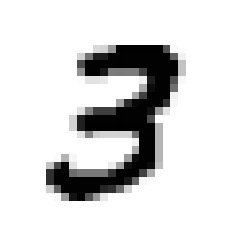

In [12]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary) #cmap = matplotlib.cm.binary ---> for making the graph black and white
plt.axis('off') # Axis OFF
plt.show() 

In [13]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

shuffle_index = np.random.permutation(len(x_train))
x_train = x_train[shuffle_index]
y_train = y_train[shuffle_index]

In [14]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [15]:
len(x_train)

60000

In [16]:
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 0)
sgd_clf.fit(x_train , y_train_3)
sgd_clf.predict([x[9]])

array([False])

In [17]:
pred = sgd_clf.predict(x_train)



from sklearn import metrics
cm = metrics.confusion_matrix(y_train_3, pred)
cm

array([[53235,   634],
       [ 1327,  4804]], dtype=int64)

In [18]:
metrics.accuracy_score(y_train_3, pred)*100

96.73166666666667

<h1>Cross - Validation</h1> <h5>(k-fold)<h5>

In [19]:
from sklearn.model_selection import cross_val_predict

In [20]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_3, cv = 3) #cv---> cross-validation
y_train_pred

array([False,  True, False, ..., False, False, False])

In [21]:
len(y_train_pred)

60000

In [22]:
metrics.accuracy_score(y_train_3, y_train_pred )*100

96.17999999999999

In [23]:
diff =((metrics.accuracy_score(y_train_3, pred))-(metrics.accuracy_score(y_train_3, y_train_pred )))
diff*100

0.5516666666666725

<h2>Decision Function</h2>

In [24]:
y_score = sgd_clf.decision_function([x[4]])
y_score 

array([-11027.89689237])

In [25]:
y_score = cross_val_predict(sgd_clf, x_train, y_train_3, cv = 3, method="decision_function")

In [26]:
len(y_score)

60000

In [27]:
y_score

array([-16098.76921766,   8016.52681802,  -6251.12573622, ...,
        -7569.9887915 , -11305.00205716,  -9530.28828654])

<h2>ROC Curve</h2>

In [28]:
from sklearn.metrics import roc_curve

In [29]:
fpr, tpr, the = roc_curve(y_train_3, y_score) #fpr --> false positive rate.. tpr---> true positive rate.. the--> threshold 

In [30]:
the

array([  31556.11551905,   31555.11551905,   12696.98794309, ...,
        -57616.93434291,  -57617.18901989, -129577.46915827])

Text(0, 0.5, 'True Positive Rate')

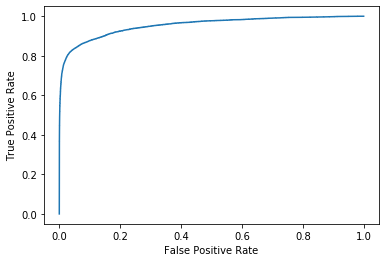

In [31]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [32]:
from sklearn.multiclass import OneVsOneClassifier

In [33]:
sgd_clf = SGDClassifier(random_state=0)
sgd_clf.fit(x_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
y_score = sgd_clf.decision_function([x[7]])
y_score

array([[ -8956.26346176, -22722.41070113, -13936.71267743,
           806.72672134, -26882.77921036,  -7353.64831744,
        -70464.66059899, -18264.60212477,  -3241.25765394,
         -5981.64987774]])

In [35]:
ovo_clf = OneVsOneClassifier(sgd_clf)
ovo_clf.fit(x_train, y_train)


OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=0, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [36]:
ovo_clf.predict([some_digit])

array([3], dtype=int8)

In [37]:
len(ovo_clf.estimators_)

45

In [38]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv = 3)

In [39]:
y_train_pred

array([9, 3, 1, ..., 6, 5, 1], dtype=int8)

In [41]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_train, y_train_pred)

In [42]:
cm

array([[5651,    0,   34,   22,   11,   34,   77,   11,   75,    8],
       [   3, 6407,   60,   23,   11,   41,   20,   14,  155,    8],
       [  62,  102, 4978,  168,   63,   39,  128,  100,  299,   19],
       [  40,   44,  127, 5353,   21,  186,   38,   78,  163,   81],
       [  16,   20,   37,   28, 5227,   25,   77,   64,  100,  248],
       [  72,   21,   55,  342,   67, 4212,  190,   33,  351,   78],
       [  32,   18,   66,   13,   42,   98, 5552,    4,   89,    4],
       [  23,   23,   88,  137,   61,   18,    8, 5552,  109,  246],
       [  40,  121,  116,  190,   57,  232,   63,   45, 4900,   87],
       [  35,   22,   31,  131,  246,   87,    5,  458,  241, 4693]],
      dtype=int64)

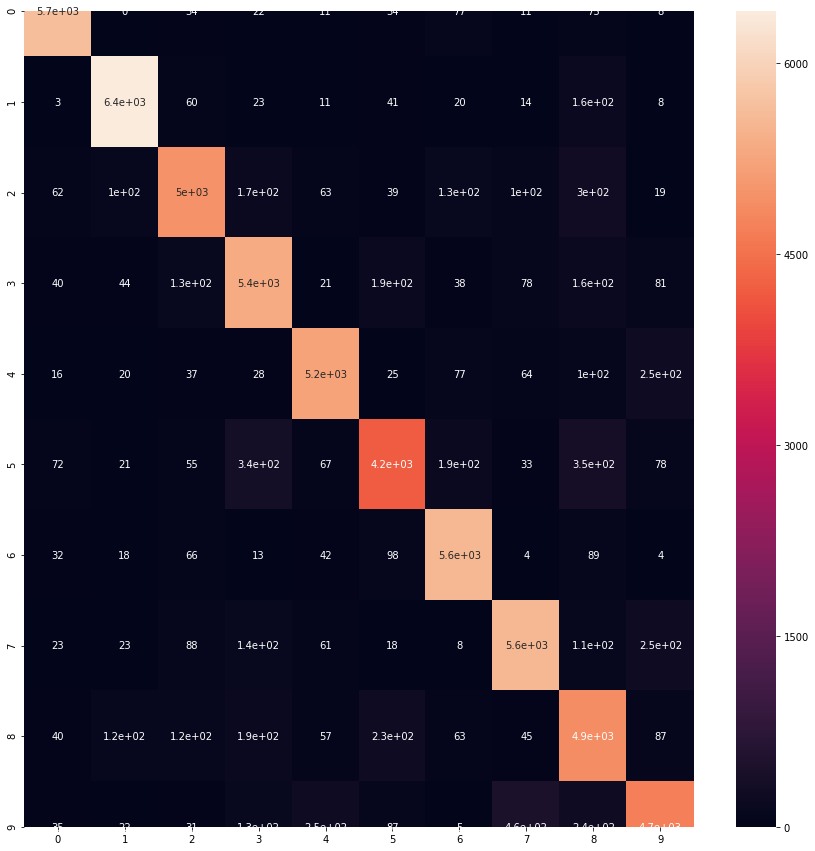

In [45]:
import seaborn as sn
plt.figure(figsize=(15,15))
sn.heatmap(cm, annot=True)
plt.show()